<h1><font color="#113D68" size=5>TINTO: Converting Tidy Data into Image for Classification with 2-Dimensional Convolutional Neural Networks</font></h1>



<h1><font color="#113D68" size=6>How to read TINTO images</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo-Cara</font><br>
<font color="#113D68" size=3>Raúl García-Castro</font><br>
<font color="#113D68" size=3>Luis Orozco-Barbosa</font><br>
</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Index</font></h2>

* [0. Context](#section0)
* [1. Description](#section1)
    * [1.1. Main Features](#section12)
    * [1.2. Citation](#section12)
* [2. Libraries](#section2)
* [3. Data processing](#section3)
    * [3.1. Read images](#section31)
    * [3.2. Data Curation](#section32)
* [4. Pre-modelling phase](#section4)
    * [4.1. Resize images](#section41)
    * [4.2. Iteradores](#section42)
* [5. Modelling with CNN](#section5)
    * [5.1. CNN](#section51)
    * [5.2. Compile and fit](#section52)
    * [5.3. Results](#section53)

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Context</font>

This is a tutorial on how to read the images created by TINTO and pass them to a very simple pretrained Convolutional Neural Network (CNN). The images must already be created by the TINTO software. See the documentation in GITHUB for how to create the images from tabular data.

Remember that when using CNN you can set the training to be done with GPUs to improve performance.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
See the paper from [Information Fusion Journal](https://doi.org/10.1016/j.inffus.2022.10.011)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
See the paper from [SoftwareX](https://doi.org/10.1016/j.softx.2023.101391)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTO in [GitHub](https://github.com/oeg-upm/TINTO)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6> 1. Description</font>

The growing interest in the use of algorithms-based machine learning for predictive tasks has generated a large and diverse development of algorithms. However, it is widely known that not all of these algorithms are adapted to efficient solutions in certain tidy data format datasets. For this reason, novel techniques are currently being developed to convert tidy data into images with the aim of using Convolutional Neural Networks (CNNs). TINTO offers the opportunity to convert tidy data into images through the representation of characteristic pixels by implementing two dimensional reduction algorithms: PCA and _t_-SNE. Our proposal also includes a blurring technique, which adds more ordered information to the image and can improve the classification task in CNNs.

---
<a id="section11"></a>
# <font color="#004D7F" size=5> 1.1. Main Features</font>

- Supports all CSV data in **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
- For now, the algorithm converts tabular data for binary and multi-class classification problems into machine learning.
- Input data formats:
    - **Tabular files**: The input data must be in **[CSV](https://en.wikipedia.org/wiki/Comma-separated_values)**, taking into account the **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
    - **Tidy Data**: The **target** (variable to be predicted) should be set as the last column of the dataset. Therefore, the first columns will be the features.
    - All data must be in numerical form. TINTO does not accept data in string or any other non-numeric format.
- Two dimensionality reduction algorithms are used in image creation, **[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)** and **[*t*-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)** from the Scikit-learn Python library.
- The synthetic images to be created will be in black and white, i.e. in 1 channel.
- The synthetic image **dimensions** can be set as a parameter when creating them.
- The synthetic images can be created using **characteristic pixels** or **blurring** painting technique (expressing an overlap of pixels as the **maximum** or **average**).
- Runs on **Linux**, **Windows** and **macOS** systems.
- Compatible with **[Python](https://www.python.org/)** 3.7 or higher.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6> 2. Libraries</font>

The first thing we need to do is to declare the libraries

In [11]:
pip install keras_preprocessing

     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [48]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
#import cv2
import gc
import matplotlib.pyplot as plt
#import openslide
#from openslide.deepzoom import DeepZoomGenerator
import tifffile as tifi
import sklearn
import tensorflow as tf

from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import vgg16, vgg19, resnet50, mobilenet, inception_resnet_v2, densenet, inception_v3, xception, nasnet, ResNet152V2
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, InputLayer, LayerNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adamax

from imblearn.over_sampling import RandomOverSampler
#Models of TINTOlib
from TINTOlib.tinto import TINTO
from TINTOlib.supertml import SuperTML
from TINTOlib.igtd import IGTD
from TINTOlib.refined import REFINED
from TINTOlib.barGraph import BarGraph
from TINTOlib.distanceMatrix import DistanceMatrix
from TINTOlib.combination import Combination

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6> 3. Data processing</font>

The first thing to do is to read all the images created by TINTO. TINTO creates a folder which contains subfolders corresponding to each target that has the problem. Each image corresponds to a sample of the original dataset.

<a id="section31"></a>
# <font color="#004D7F" size=5> 3.1. Create images with TINTOlib</font>

In [17]:
#Select the model and the parameters
problem_type = "supervised"
image_model = TINTO(problem= problem_type)

#Define the dataset path and the folder where the images will be saved
dataset_path = "C:\\Users\\Borja\\PycharmProjects\\TINTORERA\\Datasets\\cancer.csv "
images_folder = "C:\\Users\\Borja\\PycharmProjects\\TINTORERA\\tintoimages"

#Generate thet images
image_model.generateImages(dataset_path, images_folder)

img_paths = os.path.join(images_folder,problem_type+".csv")

print(img_paths)


C:\Users\Borja\PycharmProjects\TINTORERA\tintoimages\supervised.csv


<a id="section32"></a>
# <font color="#004D7F" size=5> 3.2. Read images</font>

Read the images path csv

In [62]:
df = pd.read_csv(img_paths)
df["class"] = df["class"].astype(str)
df["images"]= images_folder + "\\" + df["images"]

print(df["images"][0])
print(df["class"].value_counts())

C:\Users\Borja\PycharmProjects\TINTORERA\tintoimages\01\000000.png
-1.0    357
1.0     211
Name: class, dtype: int64


<a id="section32"></a>
# <font color="#004D7F" size=5> 3.2. Data curation</font>

Split in train/test/validation

In [63]:
df_x = df.drop('class', axis = 1)
df_y = df['class']


X_train, X_val, y_train, y_val = train_test_split(df_x, df_y, test_size = 0.40, random_state = 123)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.50, random_state = 123)


In [64]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)
df_val = pd.concat([X_val, y_val], axis = 1)

In [65]:
print(df_train['class'].value_counts())
print(' ')
print(' ')
print(df_test['class'].value_counts())
print(' ')
print(' ')
print(df_val['class'].value_counts())

-1.0    219
1.0     121
Name: class, dtype: int64
 
 
-1.0    71
1.0     43
Name: class, dtype: int64
 
 
-1.0    67
1.0     47
Name: class, dtype: int64


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6> 4. Pre-modelling phase</font>

Once the data is ready, we load it into memory with an iterator in order to pass it to the CNN.

<a id="section41"></a>
# <font color="#004D7F" size=5> 4.1. Resize images</font>

In our case, as we are going to train with a pre-trained network, we must resize it to the dimensions established by the network. Therefore, if you make a customised CNN, this cell is optional. 

In [66]:
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)
teste_datagen = ImageDataGenerator(rescale = 1./255)

In [67]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(340, 2)
(114, 2)
(114, 2)


In [68]:
image_length = 32
image_height = 32

<a id="section42"></a>
# <font color="#004D7F" size=5> 4.2. Iteradores</font>

Create iterators for train/test/validation

In [69]:
train_iter = train_datagen.flow_from_dataframe(
    df_train, 
    target_size = (image_length, image_height),
    x_col = 'images',
    y_col = 'class',
    class_mode = 'categorical',
    batch_size = 8,
    shuffle = True
)

Found 340 validated image filenames belonging to 2 classes.


In [70]:
valid_iter = train_datagen.flow_from_dataframe(
    df_val, 
    target_size = (image_length, image_height),
    x_col = 'images',
    y_col = 'class',
    class_mode = 'categorical',
    batch_size = 8
)

Found 114 validated image filenames belonging to 2 classes.


In [71]:
test_iter = train_datagen.flow_from_dataframe(
    df_test, 
    target_size = (image_length, image_height),
    x_col = 'images',
    y_col = 'class',
    class_mode = 'categorical',
    batch_size = 8,
    shuffle = True
)

Found 114 validated image filenames belonging to 2 classes.


In [72]:
print(train_iter.image_shape)
print(valid_iter.image_shape)
print(test_iter.image_shape)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section5"></a>
# <font color="#004D7F" size=6> 5. Modelling with CNN</font>

Now we can start the CNN training. Before that we prepare the algorithm for reading data.

<a id="section51"></a>
# <font color="#004D7F" size=5> 5.1. CNN</font>

In [73]:
model = vgg16.VGG16(
                    input_shape = (image_length, image_height, 3),
                    include_top = False,
                    pooling = 'avg',
                    weights = 'imagenet'
                    )


model.trainable = False


x = Dense(2,
          activation = 'softmax',
          name = 'new_output')(model.output) 


model = Model(model.input, x)

<a id="section52"></a>
# <font color="#004D7F" size=5> 5.2. Compile and fit</font>

In [74]:
METRICS = [
      tf.keras.metrics.TruePositives(name = 'tp'),
      tf.keras.metrics.FalsePositives(name = 'fp'),
      tf.keras.metrics.TrueNegatives(name = 'tn'),
      tf.keras.metrics.FalseNegatives(name = 'fn'), 
      tf.keras.metrics.BinaryAccuracy(name ='accuracy'),
      tf.keras.metrics.Precision(name = 'precision'),
      tf.keras.metrics.Recall(name = 'recall'),
      tf.keras.metrics.AUC(name = 'auc'),
]

In [75]:
model.compile(
                #optimizer = sgd,
                #optimizer = opt,
                optimizer = 'adam',
                #optimizer = 'Adadelta',
                #optimizer = 'Adamax',
                
                metrics = METRICS,
                #metrics = ['accuracy'],
                #metrics = ['mse'],
                
                #loss = 'binary_crossentropy'
                loss = 'categorical_crossentropy'
                #loss = 'mean_absolute_error'
                #loss = 'mse'
                #loss = 'mean_squared_logarithmic_error'
                )

In [76]:
number_epoch = 50


modelfitprogress2 = model.fit(
                              train_iter,
                              validation_data = valid_iter,
                              epochs = number_epoch,
                              steps_per_epoch = df_train.shape[0]//train_iter.batch_size,
                              validation_steps = df_val.shape[0]//valid_iter.batch_size,
                              #callbacks = [reduce_lr, early_stop, checkpoint]
                              )

Epoch 1/50
42/42 [==============================] - 3s 43ms/step - loss: 0.6308 - tp: 215.0000 - fp: 117.0000 - tn: 215.0000 - fn: 117.0000 - accuracy: 0.6476 - precision: 0.6476 - recall: 0.6476 - auc: 0.7117 - val_loss: 0.6519 - val_tp: 66.0000 - val_fp: 46.0000 - val_tn: 66.0000 - val_fn: 46.0000 - val_accuracy: 0.5893 - val_precision: 0.5893 - val_recall: 0.5893 - val_auc: 0.7508
Epoch 2/50
42/42 [==============================] - 2s 36ms/step - loss: 0.5815 - tp: 223.0000 - fp: 109.0000 - tn: 223.0000 - fn: 109.0000 - accuracy: 0.6717 - precision: 0.6717 - recall: 0.6717 - auc: 0.7838 - val_loss: 0.5747 - val_tp: 71.0000 - val_fp: 41.0000 - val_tn: 71.0000 - val_fn: 41.0000 - val_accuracy: 0.6339 - val_precision: 0.6339 - val_recall: 0.6339 - val_auc: 0.7864
Epoch 3/50
42/42 [==============================] - 2s 36ms/step - loss: 0.5548 - tp: 237.0000 - fp: 95.0000 - tn: 237.0000 - fn: 95.0000 - accuracy: 0.7139 - precision: 0.7139 - recall: 0.7139 - auc: 0.7960 - val_loss: 0.5432

42/42 [==============================] - 1s 35ms/step - loss: 0.3370 - tp: 279.0000 - fp: 53.0000 - tn: 279.0000 - fn: 53.0000 - accuracy: 0.8404 - precision: 0.8404 - recall: 0.8404 - auc: 0.9413 - val_loss: 0.3636 - val_tp: 94.0000 - val_fp: 18.0000 - val_tn: 94.0000 - val_fn: 18.0000 - val_accuracy: 0.8393 - val_precision: 0.8393 - val_recall: 0.8393 - val_auc: 0.9200
Epoch 23/50
42/42 [==============================] - 1s 36ms/step - loss: 0.3216 - tp: 285.0000 - fp: 47.0000 - tn: 285.0000 - fn: 47.0000 - accuracy: 0.8584 - precision: 0.8584 - recall: 0.8584 - auc: 0.9519 - val_loss: 0.3996 - val_tp: 92.0000 - val_fp: 20.0000 - val_tn: 92.0000 - val_fn: 20.0000 - val_accuracy: 0.8214 - val_precision: 0.8214 - val_recall: 0.8214 - val_auc: 0.9005
Epoch 24/50
42/42 [==============================] - 2s 36ms/step - loss: 0.3190 - tp: 289.0000 - fp: 43.0000 - tn: 289.0000 - fn: 43.0000 - accuracy: 0.8705 - precision: 0.8705 - recall: 0.8705 - auc: 0.9494 - val_loss: 0.3224 - val_tp: 97

42/42 [==============================] - 1s 34ms/step - loss: 0.2611 - tp: 301.0000 - fp: 31.0000 - tn: 301.0000 - fn: 31.0000 - accuracy: 0.9066 - precision: 0.9066 - recall: 0.9066 - auc: 0.9703 - val_loss: 0.3431 - val_tp: 96.0000 - val_fp: 16.0000 - val_tn: 96.0000 - val_fn: 16.0000 - val_accuracy: 0.8571 - val_precision: 0.8571 - val_recall: 0.8571 - val_auc: 0.9271
Epoch 44/50
42/42 [==============================] - 1s 34ms/step - loss: 0.2635 - tp: 297.0000 - fp: 35.0000 - tn: 297.0000 - fn: 35.0000 - accuracy: 0.8946 - precision: 0.8946 - recall: 0.8946 - auc: 0.9665 - val_loss: 0.3113 - val_tp: 99.0000 - val_fp: 13.0000 - val_tn: 99.0000 - val_fn: 13.0000 - val_accuracy: 0.8839 - val_precision: 0.8839 - val_recall: 0.8839 - val_auc: 0.9419
Epoch 45/50
42/42 [==============================] - 1s 35ms/step - loss: 0.2583 - tp: 294.0000 - fp: 38.0000 - tn: 294.0000 - fn: 38.0000 - accuracy: 0.8855 - precision: 0.8855 - recall: 0.8855 - auc: 0.9676 - val_loss: 0.3180 - val_tp: 98

<a id="section53"></a>
# <font color="#004D7F" size=5> 5.3. Results</font>

Finally, we can evaluate our CNN with the images created by TINTO in any of the ways represented below.

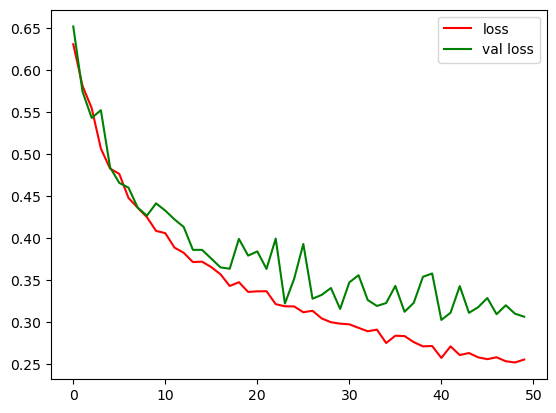

In [77]:
plt.plot(modelfitprogress2.history['loss'], color = 'red', label = 'loss')
plt.plot(modelfitprogress2.history['val_loss'], color = 'green', label = 'val loss')
plt.legend(loc = 'upper right')
plt.show()

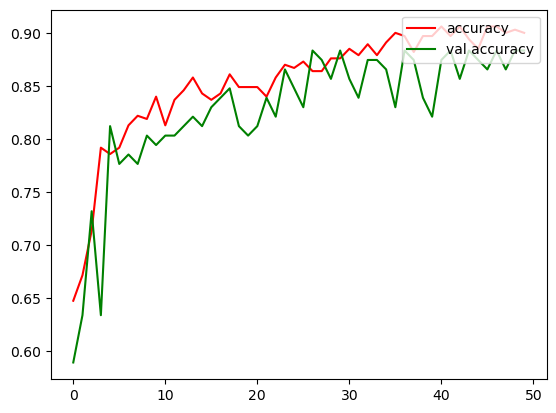

In [78]:
plt.plot(modelfitprogress2.history['accuracy'], color = 'red', label = 'accuracy')
plt.plot(modelfitprogress2.history['val_accuracy'], color = 'green', label = 'val accuracy')
plt.legend(loc = 'upper right')
plt.show()

In [79]:
score = model.evaluate(valid_iter, steps = df_val.shape[0]//valid_iter.batch_size)
print("Loss in validation: {} \nAccuracy in validation: {}".format(score[0], score[5]))

14/14 [==============================] - 0s 27ms/step - loss: 0.2871 - tp: 101.0000 - fp: 11.0000 - tn: 101.0000 - fn: 11.0000 - accuracy: 0.9018 - precision: 0.9018 - recall: 0.9018 - auc: 0.9511
Loss in validation: 0.28705543279647827 
Accuracy in validation: 0.9017857313156128


In [80]:
score = model.evaluate(test_iter, steps = df_test.shape[0]//test_iter.batch_size)
print("Loss in test: {} \nAccuracy in test: {}".format(score[0], score[5]))

14/14 [==============================] - 0s 27ms/step - loss: 0.2110 - tp: 104.0000 - fp: 8.0000 - tn: 104.0000 - fn: 8.0000 - accuracy: 0.9286 - precision: 0.9286 - recall: 0.9286 - auc: 0.9811
Loss in test: 0.21095658838748932 
Accuracy in test: 0.9285714030265808


In [81]:
print(train_iter.class_indices)
print(test_iter.class_indices)
print(valid_iter.class_indices)

{'-1.0': 0, '1.0': 1}
{'-1.0': 0, '1.0': 1}
{'-1.0': 0, '1.0': 1}


In [82]:
prediction = model.predict(test_iter, steps = np.math.ceil(test_iter.samples/test_iter.batch_size))
print(prediction)

15/15 [==============================] - 1s 24ms/step
[[2.36168817e-01 7.63831198e-01]
 [7.62721419e-01 2.37278551e-01]
 [9.99206960e-01 7.93021114e-04]
 [9.79063928e-01 2.09360681e-02]
 [7.62205571e-02 9.23779428e-01]
 [6.28043056e-01 3.71956885e-01]
 [2.82285124e-01 7.17714906e-01]
 [9.40484881e-01 5.95150888e-02]
 [9.72360671e-01 2.76393499e-02]
 [3.16132635e-01 6.83867395e-01]
 [6.18427932e-01 3.81572098e-01]
 [3.17444593e-01 6.82555377e-01]
 [8.04013968e-01 1.95986047e-01]
 [2.82466058e-02 9.71753418e-01]
 [1.60451725e-01 8.39548230e-01]
 [2.04744279e-01 7.95255721e-01]
 [8.69735897e-01 1.30264044e-01]
 [9.71258342e-01 2.87416540e-02]
 [3.00393194e-01 6.99606836e-01]
 [2.58230090e-01 7.41769910e-01]
 [9.14301872e-01 8.56981426e-02]
 [9.79684114e-01 2.03159004e-02]
 [4.44803573e-02 9.55519617e-01]
 [1.42879054e-01 8.57120991e-01]
 [8.21475029e-01 1.78525016e-01]
 [9.40858841e-01 5.91411516e-02]
 [1.01746134e-01 8.98253858e-01]
 [9.86957967e-01 1.30420653e-02]
 [6.76931143e-01 3.230

In [83]:
predicted_classes = np.argmax(prediction, axis = 1)
print(predicted_classes)

[1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0
 0 1 0]


In [84]:
x = pd.DataFrame(predicted_classes, columns = ['class'])
x['class'].value_counts()

0    74
1    40
Name: class, dtype: int64

In [85]:
true_classes = test_iter.classes
class_labels = list(test_iter.class_indices.keys())  

In [86]:
report = sklearn.metrics.classification_report(true_classes, 
                                               predicted_classes, 
                                               target_names = class_labels)
print(report) 

              precision    recall  f1-score   support

        -1.0       0.64      0.66      0.65        71
         1.0       0.40      0.37      0.39        43

    accuracy                           0.55       114
   macro avg       0.52      0.52      0.52       114
weighted avg       0.55      0.55      0.55       114



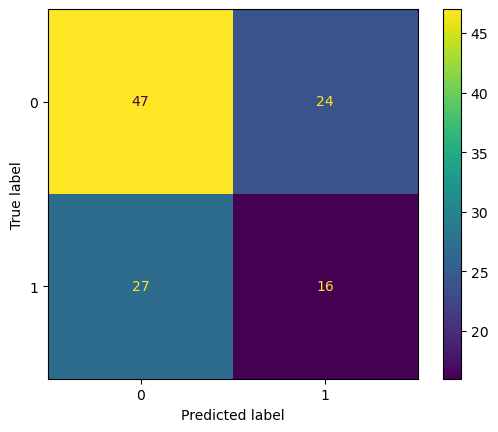

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_classes, predicted_classes)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>